<a href="https://colab.research.google.com/github/brunogomesmkt/brunogomesmkt/blob/main/Projeto_Titanic_An%C3%A1lise_de_Dados_e_Modelo_Preditivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Importar bibliotecas

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração opcional de visualização
sns.set(style="whitegrid")

# Etapa 2: Carregar o dataset

In [6]:
# Carregando o dataset
df = pd.read_csv("/content/drive/MyDrive/1 - Treinos Ciência de Dados 2025/Análise de dados_Taitanic/titanic/train.csv")

# Visualizando as primeiras linhas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Etapa 3: Análise Exploratória (EDA)

Informações básicas

In [7]:
# Dimensão do dataset
print("Dimensões:", df.shape)

# Tipos e valores ausuentes
df.info()

# Estatísiticas descitivas
df.describe()

Dimensões: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Verificando valores ausentes

In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Etapa 4: Visualizações básicas

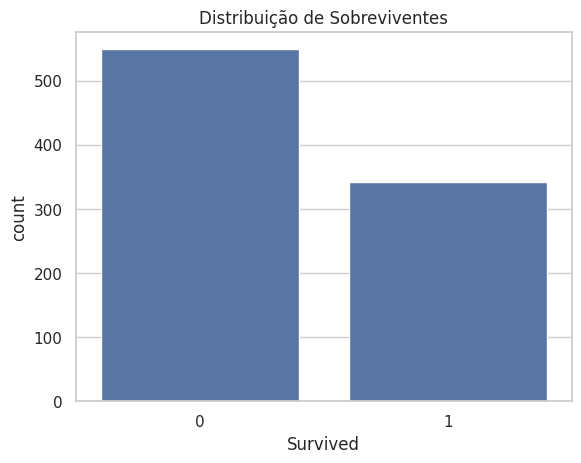

In [9]:
sns.countplot(x="Survived", data=df)
plt.title("Distribuição de Sobreviventes")
plt.show()

# Sexo vs Sobrevivência

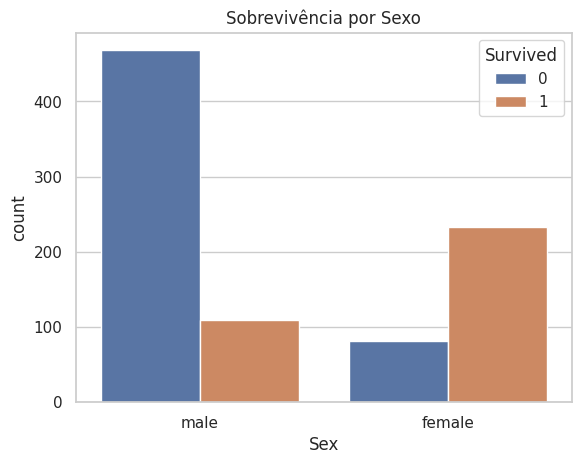

In [10]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Sobrevivência por Sexo")
plt.show()

# Idade vs Sobrevivência

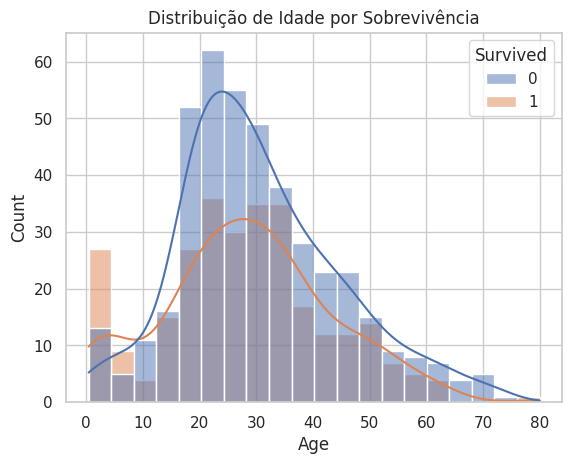

In [12]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Distribuição de Idade por Sobrevivência')
plt.show()

# Etapa 5: Limpeza e preparação dos dados

Preenchendo valores ausentes

In [14]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-14-2359842934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-14-2359842934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

# Removendo colunas irrelevantes

In [15]:
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# Codificação de variáveis categóricas

In [16]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Etapa 6: Criando e avaliando um modelo

Separando variáveis dependente e independentes

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Features e target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo

In [20]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.8100558659217877

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

